In [1]:
print("this is a test")

this is a test


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install pyarrow
%pip install imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Drop id and Unnamed columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
# Drop standard error columns
#df.drop(columns=["radius_se", "texture_se", "perimeter_se", 
                 #"area_se", "smoothness_se", "compactness_se", 
                 #"concavity_se", "concave points_se", "symmetry_se", 
                 #"fractal_dimension_se"], inplace=True)
#df

In [4]:
# Standardize the data (other than diagnosis)
for col in df.columns[1:]:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [5]:
# Encode diagnosis column (M = 1, B = 0, using LabelEncoder)
diagnosis_values = df["diagnosis"].values
le = LabelEncoder()
diagnosis_values = le.fit_transform(diagnosis_values)
df["diagnosis"] = diagnosis_values

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Implement 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 30), (143, 30), (571,), (143,))

In [9]:
# Call a baseline Decision Tree with a random state of 42 (same as train-test-split)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1: {dt_f1}")

Decision Tree Precision: 0.9726027397260274
Decision Tree Accuracy: 0.965034965034965
Decision Tree Recall: 0.9594594594594594
Decision Tree F1: 0.9659863945578231


In [10]:
# Confusion Matrix for baseline decision tree
def plot_confusion_matrix(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.title(title)
  plt.show()

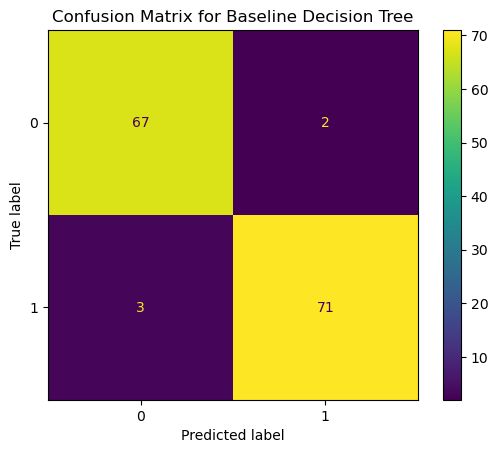

In [11]:
plot_confusion_matrix(y_test=y_test, y_pred=dt_pred, title="Confusion Matrix for Baseline Decision Tree")

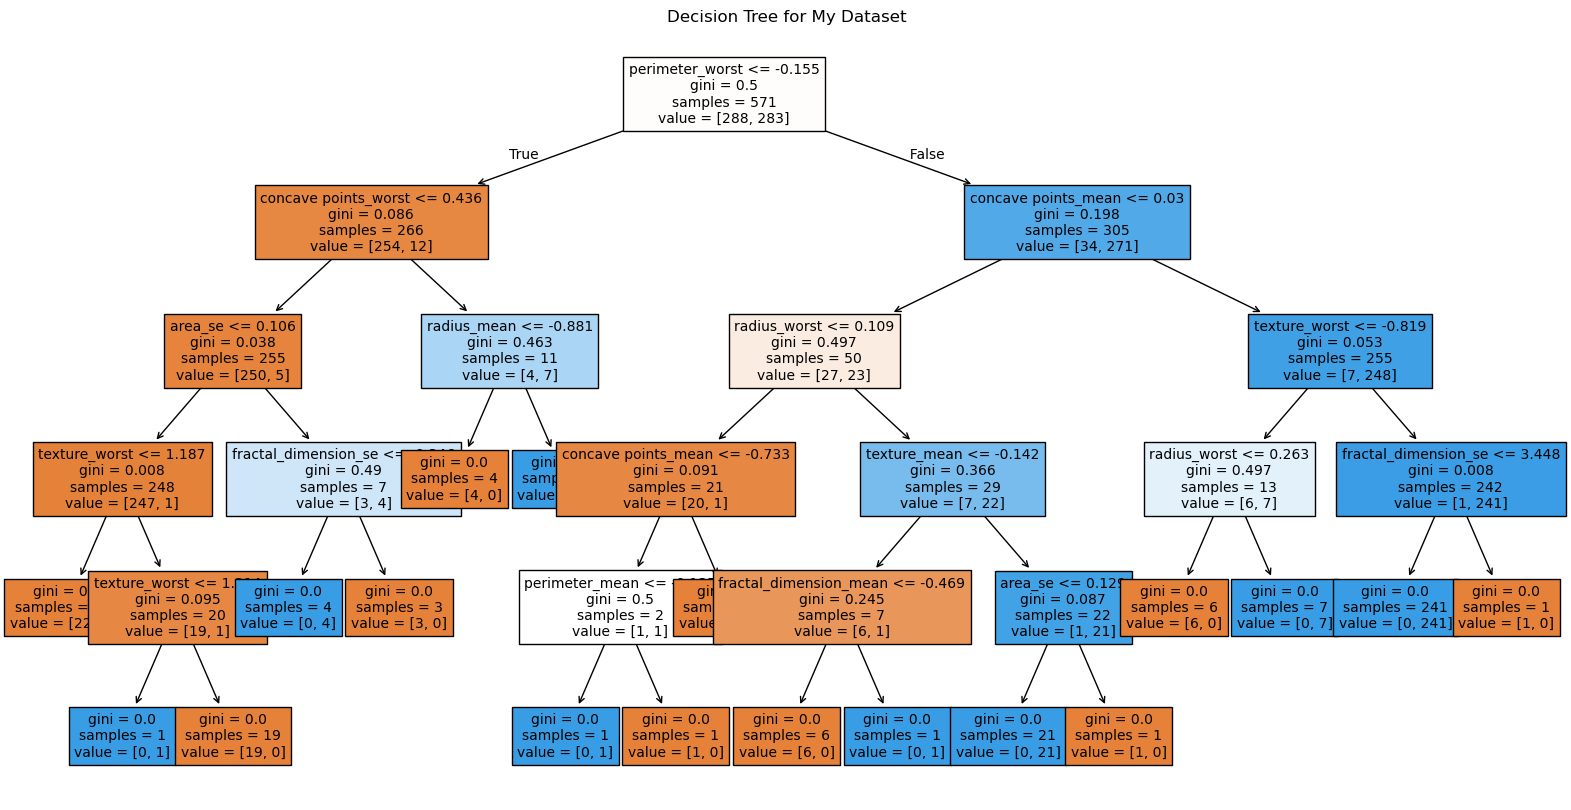

In [12]:
# Let's also plot our baseline DT
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X_smote.columns, fontsize=10)
plt.title('Decision Tree for My Dataset')
plt.show()

In [13]:
# Plot feature importances
import matplotlib.ticker as mtick
def plot_feature_importances(my_tree, title):
    fig, ax = plt.subplots(figsize=(20,10))
    bar_container = ax.barh(X_smote.columns, (my_tree.feature_importances_ * 100))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set(ylabel='Features', xlabel=title)
    ax.bar_label(bar_container, fmt='%.02f%%')
    plt.show()

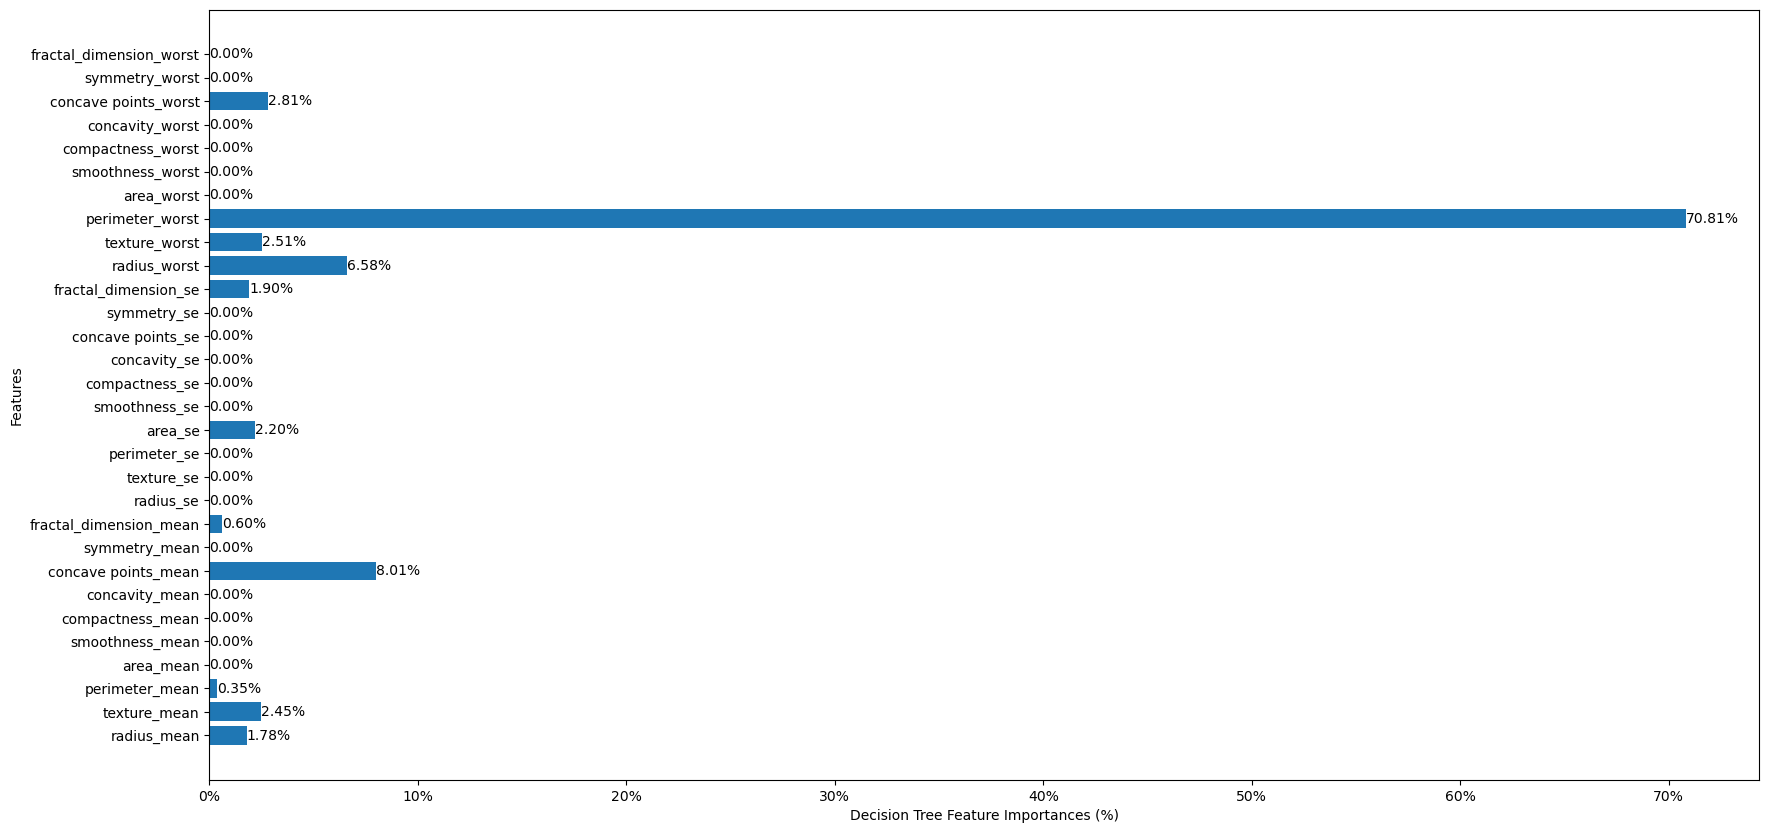

In [14]:
plot_feature_importances(dt, "Decision Tree Feature Importances (%)")

In [15]:
# Make a baseline random forest
my_rf = RandomForestClassifier(random_state=42)
my_rf.fit(X_train, y_train)
my_rf_pred = my_rf.predict(X_test)
my_rf_accuracy = accuracy_score(y_test, my_rf_pred)
my_rf_precision = precision_score(y_test, my_rf_pred)
my_rf_recall = recall_score(y_test, my_rf_pred)
my_rf_f1 = f1_score(y_test, my_rf_pred)

print(f"Baseline Random Forest - Precision: {my_rf_precision:.2f}")
print(f"Basline Random Forest - Accuracy: {my_rf_accuracy:.2f}")
print(f"Baseline Random Forest - Recall: {my_rf_recall:.2f}")
print(f"Basline Random Forest - F1: {my_rf_f1:.2f}")


Baseline Random Forest - Precision: 0.97
Basline Random Forest - Accuracy: 0.97
Baseline Random Forest - Recall: 0.97
Basline Random Forest - F1: 0.97


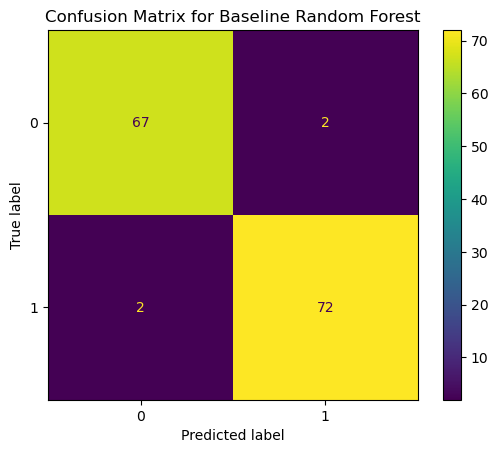

In [16]:
plot_confusion_matrix(y_test=y_test, y_pred=my_rf_pred, title="Confusion Matrix for Baseline Random Forest")

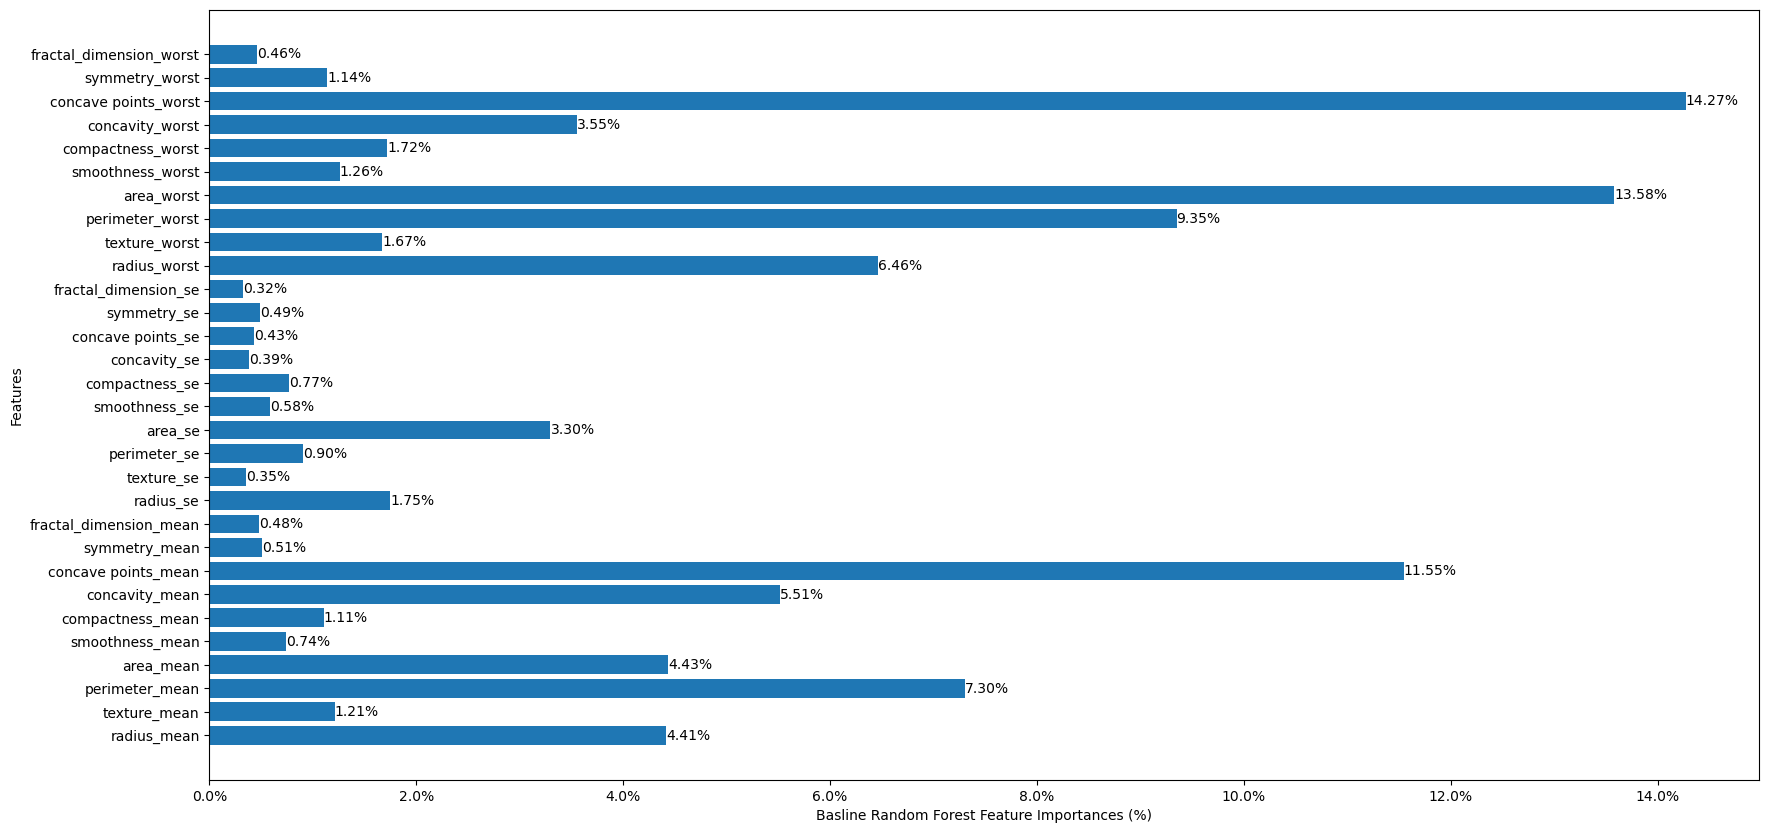

In [17]:
plot_feature_importances(my_rf, "Basline Random Forest Feature Importances (%)")

In [18]:
# Now we must TUNE the baseline using grid search!
from sklearn.model_selection import GridSearchCV
def grid_search_random_forest(X, y, param_grid):
  smote = SMOTE(random_state=42)
  X_smote, y_smote = smote.fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
  grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_rf = grid_search.best_estimator_
  best_rf_pred = best_rf.predict(X_test)
  best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
  best_rf_precision = precision_score(y_test, best_rf_pred)
  best_rf_recall = recall_score(y_test, best_rf_pred)
  best_rf_f1 = f1_score(y_test, best_rf_pred)

  print(f"Random Forest - Precision: {best_rf_precision:.2f}")
  print(f"Random Forest - Accuracy: {best_rf_accuracy:.2f}")
  print(f"Random Forest - Recall: {best_rf_recall:.2f}")
  print(f"Random Forest - F1: {best_rf_f1:.2f}")
  return best_rf, best_rf_pred, best_rf_precision, best_rf_accuracy, best_rf_recall, best_rf_f1, y_test # for feature importances and stuff

In [19]:
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

v1rf, v1pred, v1prec, v1acc, v1rec, v1f1, v1_ytest = grid_search_random_forest(X, y, param_grid1)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Random Forest - Precision: 0.99
Random Forest - Accuracy: 0.99
Random Forest - Recall: 0.99
Random Forest - F1: 0.99


In [20]:
print(v1rf)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)


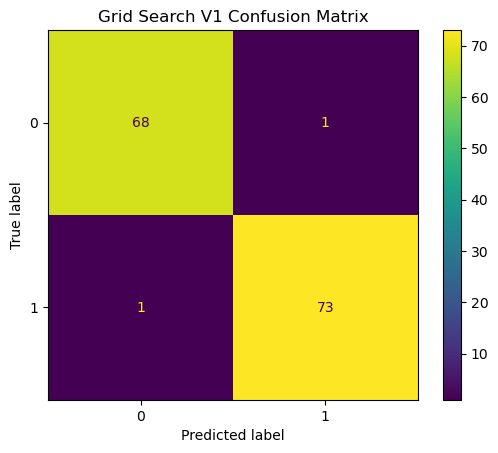

In [21]:
plot_confusion_matrix(v1_ytest, v1pred, "Grid Search V1 Confusion Matrix")

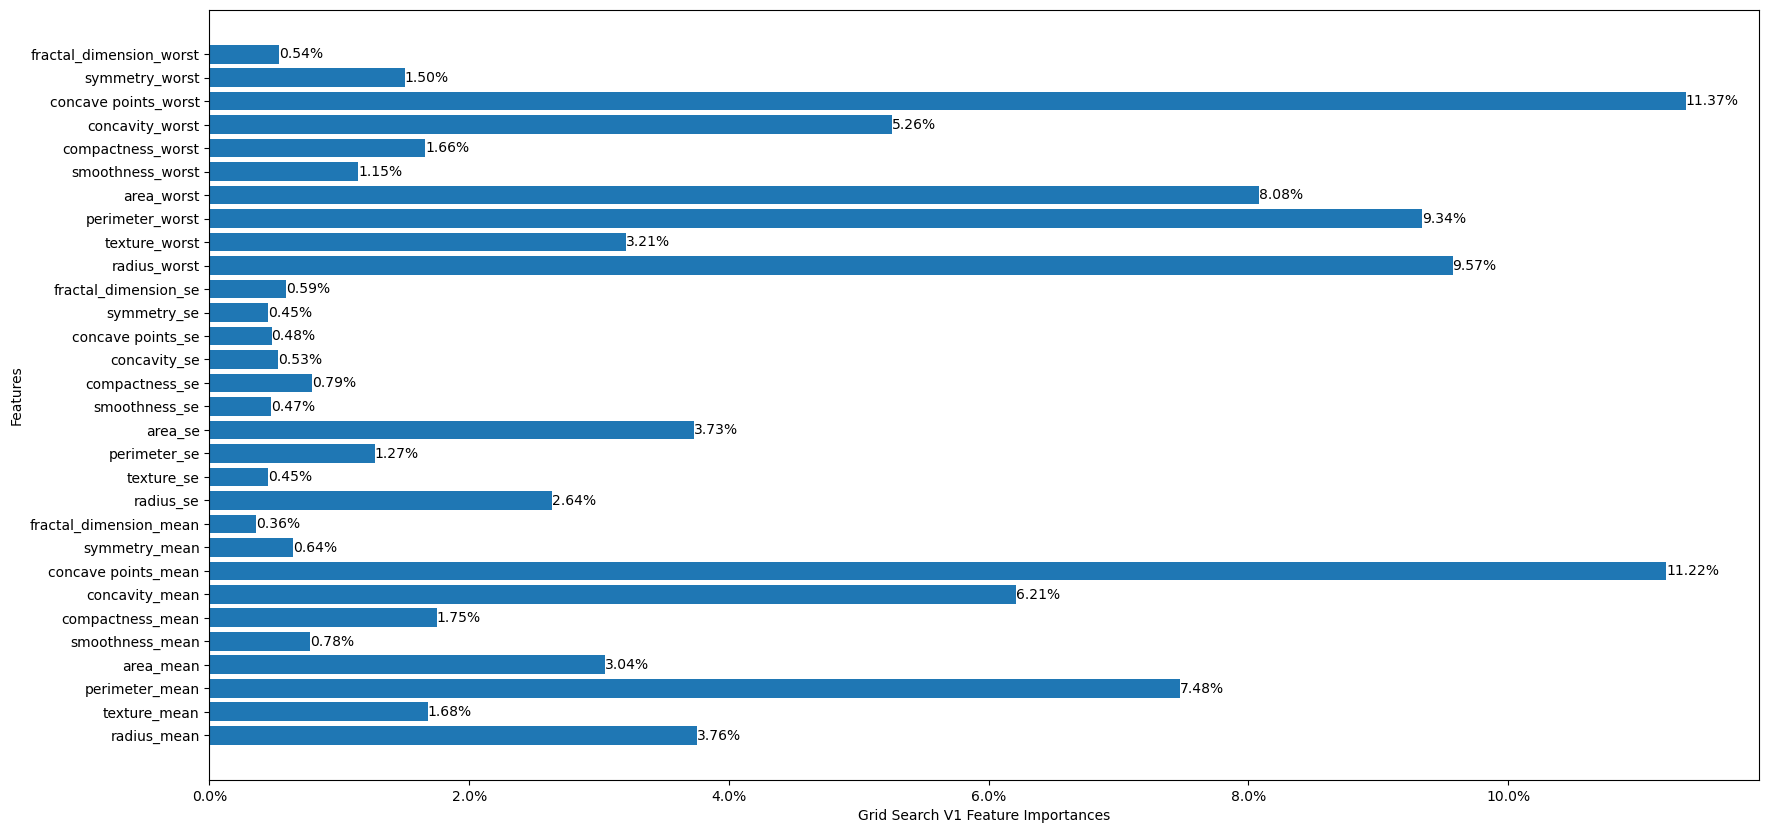

In [22]:
plot_feature_importances(v1rf, "Grid Search V1 Feature Importances")

In [23]:
param_grid2 = {
    'n_estimators': [25, 50, 75],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

v2rf, v2pred, v2prec, v2acc, v2rec, v2f1, v2_ytest = grid_search_random_forest(X, y, param_grid2)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\SanikaRewatkar\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest - Precision: 0.99
Random Forest - Accuracy: 0.98
Random Forest - Recall: 0.97
Random Forest - F1: 0.98


In [24]:
print(v2rf)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, random_state=42)


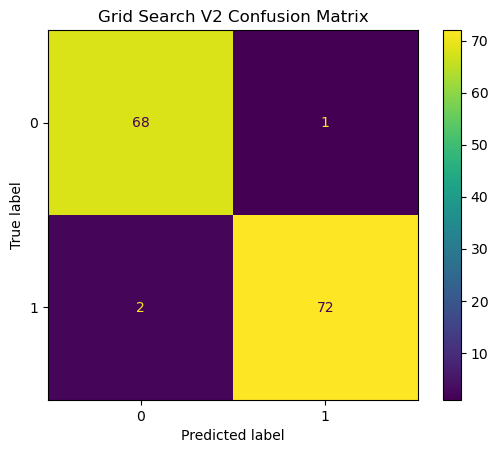

In [25]:
plot_confusion_matrix(v2_ytest, v2pred, "Grid Search V2 Confusion Matrix")

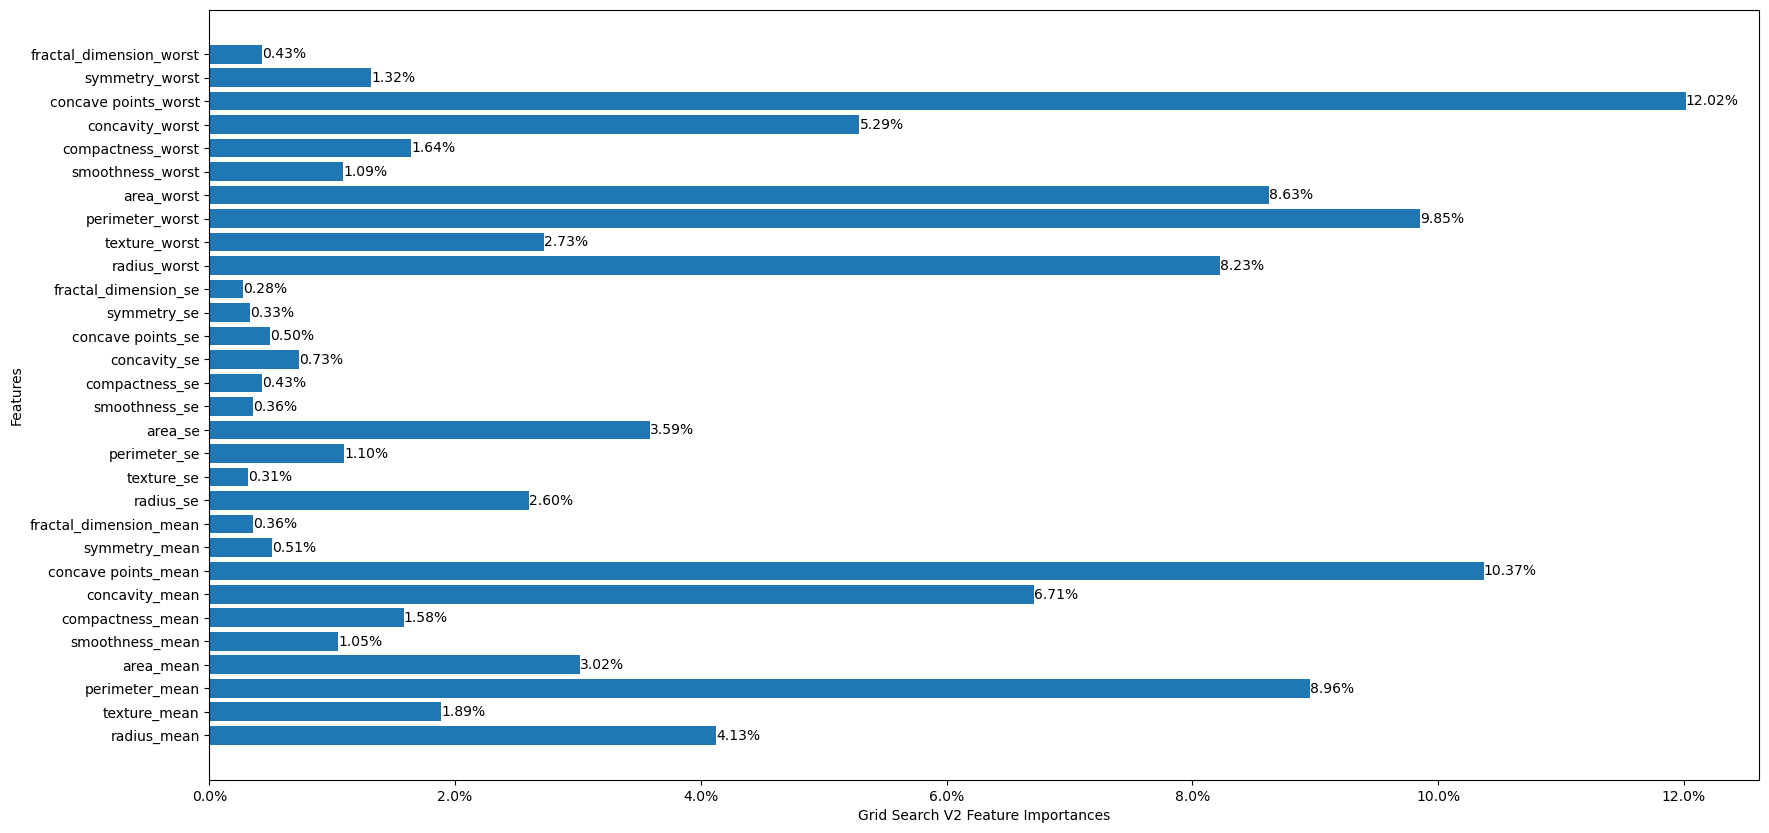

In [26]:
plot_feature_importances(v2rf, "Grid Search V2 Feature Importances")

In [27]:
param_grid3 = {
    'n_estimators': [200, 300, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [5, 6, 7, 8],
    'min_samples_leaf': [5, 6, 7, 8]
}

v3rf, v3pred, v3prec, v3acc, v3rec, v3f1, v3_ytest = grid_search_random_forest(X, y, param_grid3)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Random Forest - Precision: 0.96
Random Forest - Accuracy: 0.97
Random Forest - Recall: 0.97
Random Forest - F1: 0.97


In [28]:
print(v3rf)

RandomForestClassifier(criterion='entropy', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=400, random_state=42)


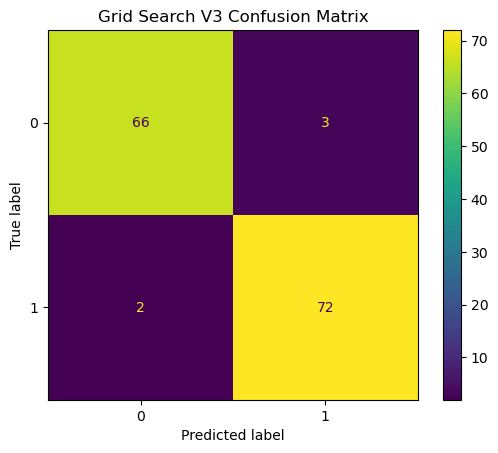

In [29]:
plot_confusion_matrix(v3_ytest, v3pred, "Grid Search V3 Confusion Matrix")

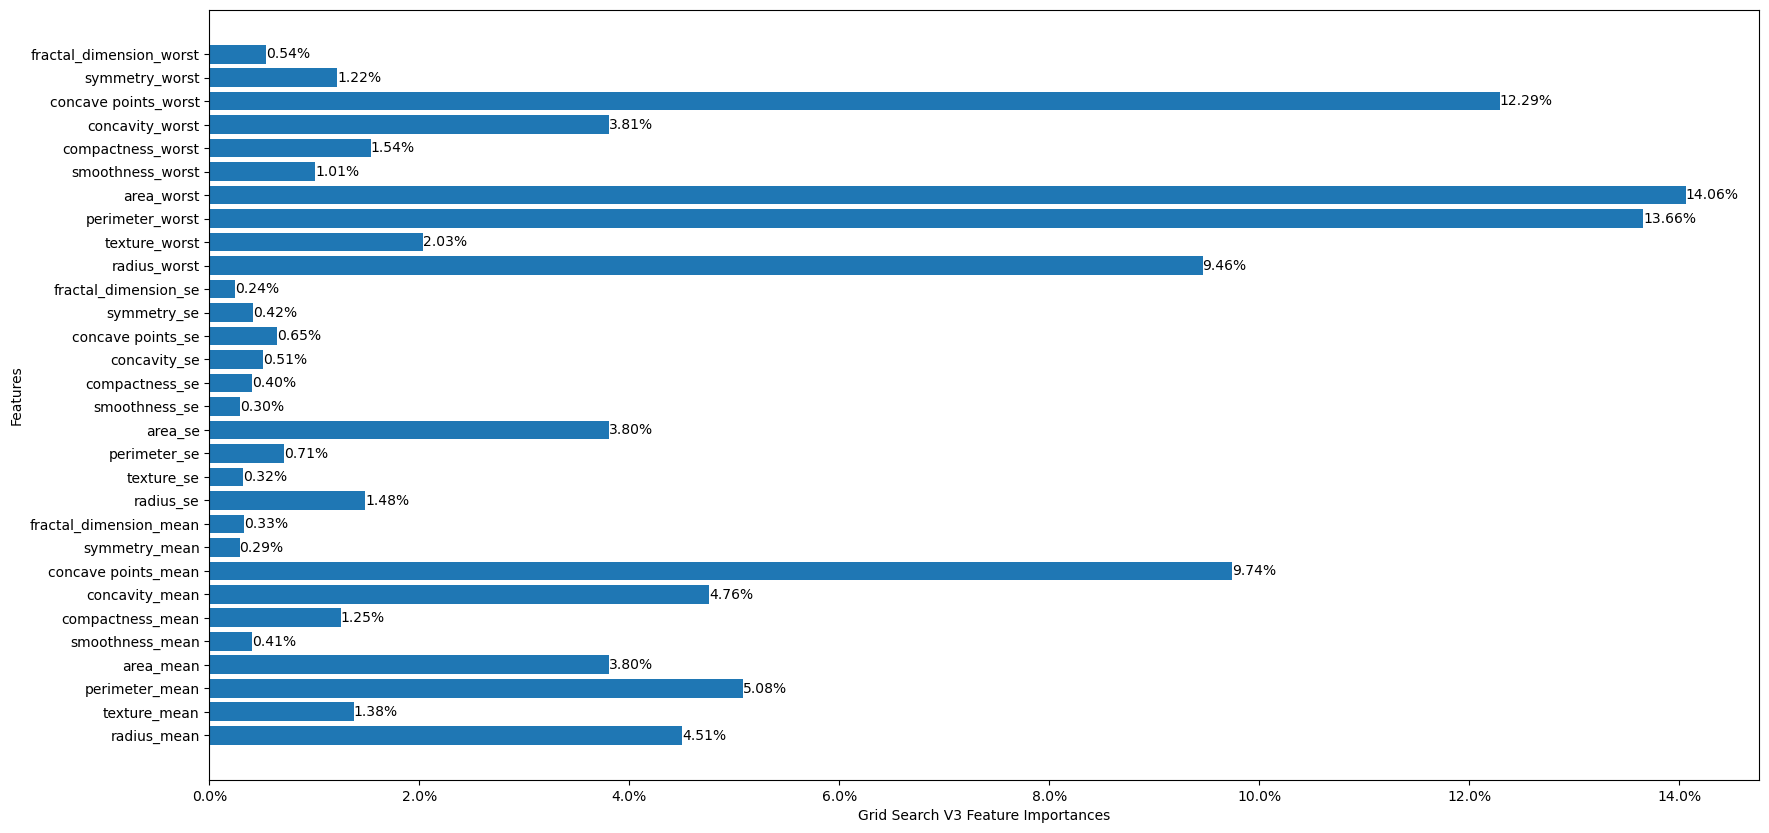

In [30]:
plot_feature_importances(v3rf, "Grid Search V3 Feature Importances")

In [31]:
param_grid4 = {
    'n_estimators': [50, 75, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

v4rf, v4pred, v4prec, v4acc, v4rec, v4f1, v4_ytest = grid_search_random_forest(X, y, param_grid4)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Random Forest - Precision: 0.99
Random Forest - Accuracy: 0.98
Random Forest - Recall: 0.97
Random Forest - F1: 0.98


In [32]:
print(v4rf)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50,
                       random_state=42)


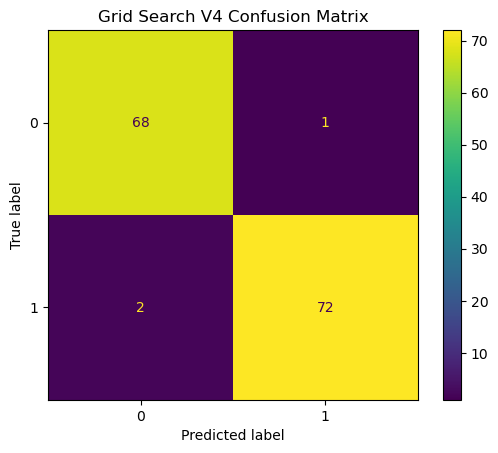

In [33]:
plot_confusion_matrix(v4_ytest, v4pred, "Grid Search V4 Confusion Matrix")

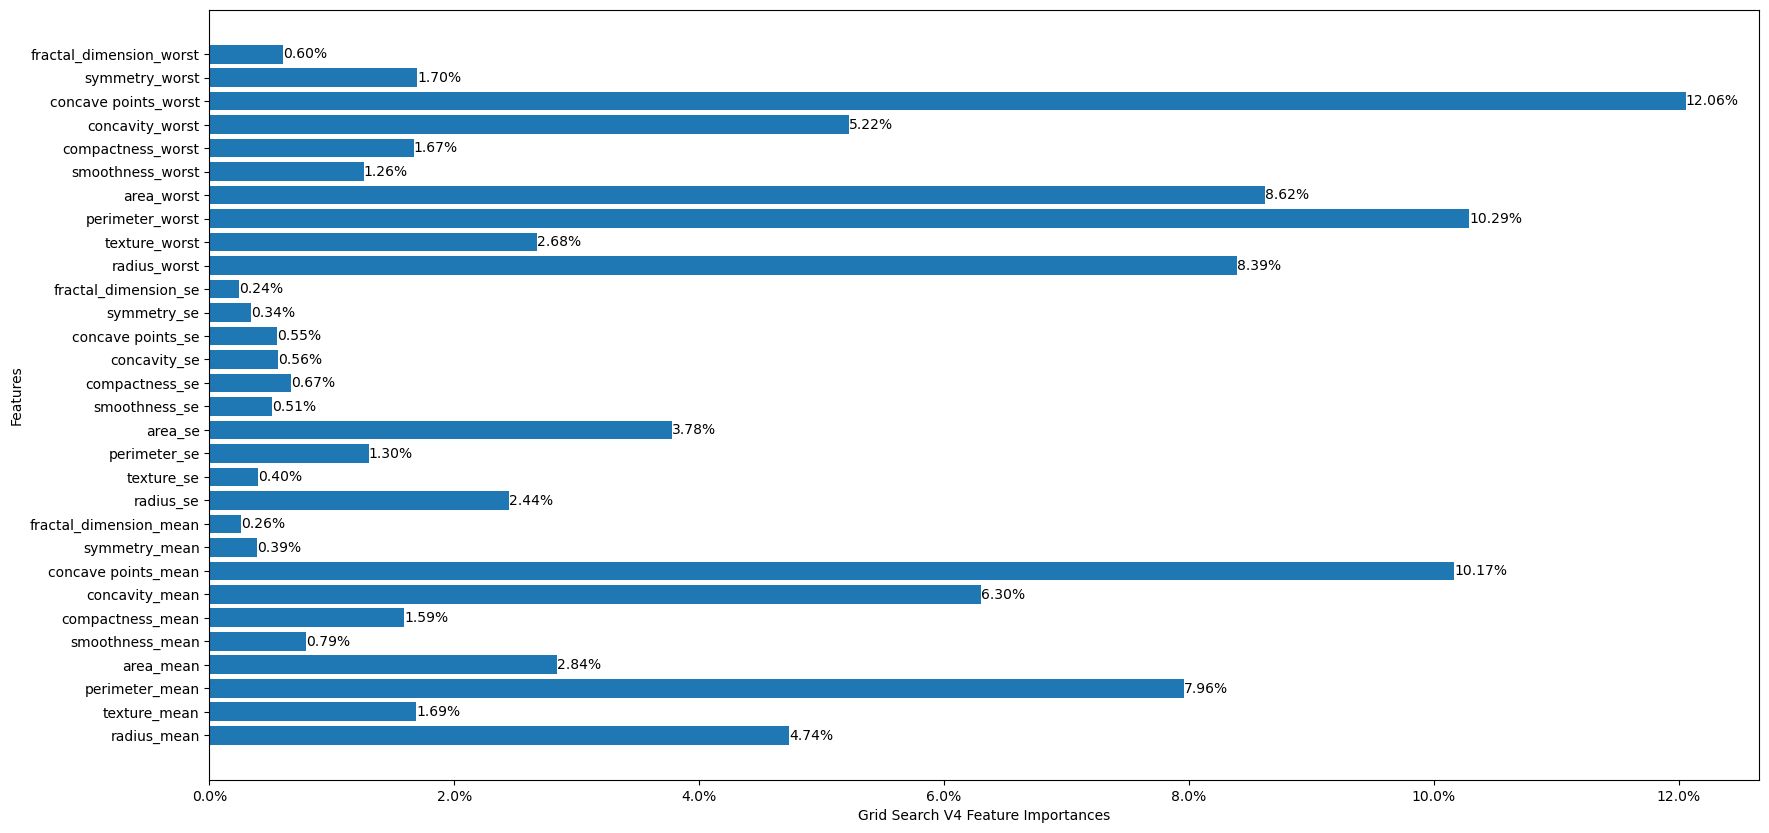

In [34]:
plot_feature_importances(v4rf, "Grid Search V4 Feature Importances")

In [35]:
param_grid5 = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 7, 10],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [3,4,5]
}

v5rf, v5pred, v5prec, v5acc, v5rec, v5f1, v5_ytest = grid_search_random_forest(X, y, param_grid5)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Random Forest - Precision: 0.99
Random Forest - Accuracy: 0.98
Random Forest - Recall: 0.97
Random Forest - F1: 0.98


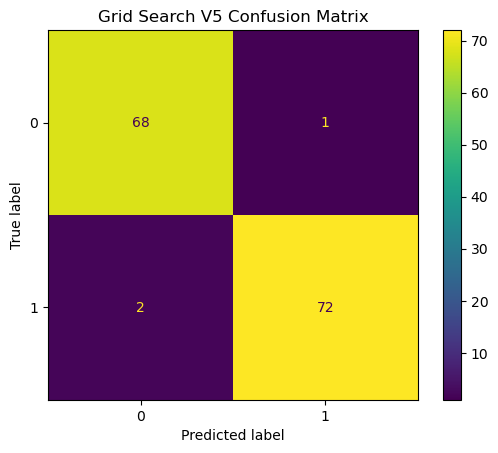

In [36]:
plot_confusion_matrix(v5_ytest, v5pred, "Grid Search V5 Confusion Matrix")

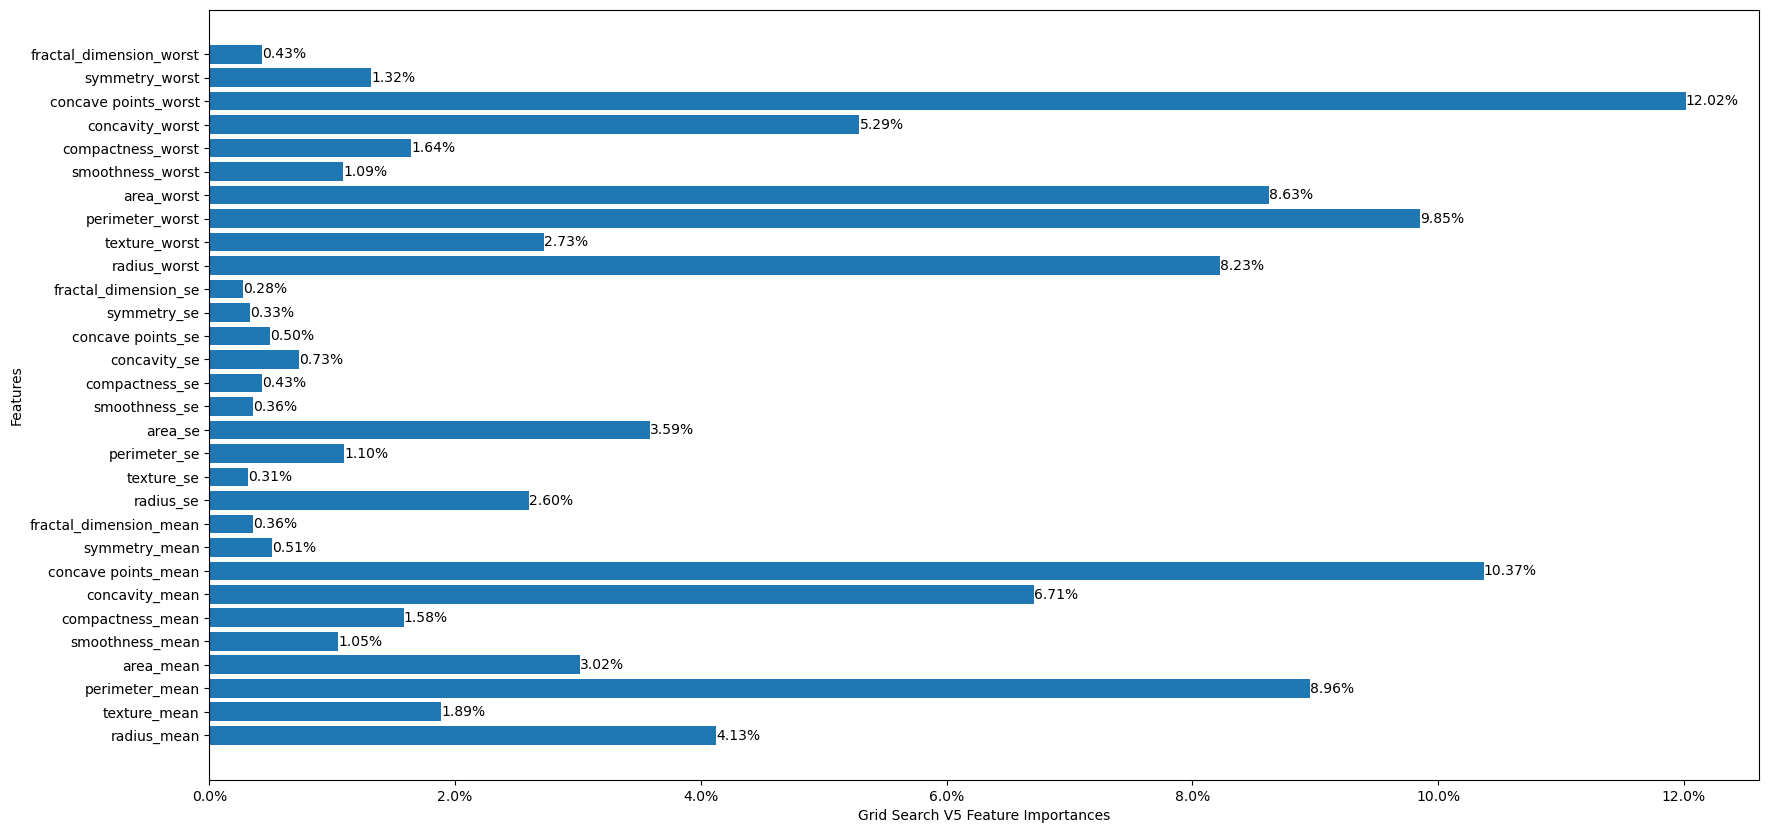

In [37]:
plot_feature_importances(v5rf, "Grid Search V5 Feature Importances")

In [38]:
rf_experiments_recall = [v1rec, v2rec, v3rec, v4rec, v5rec]

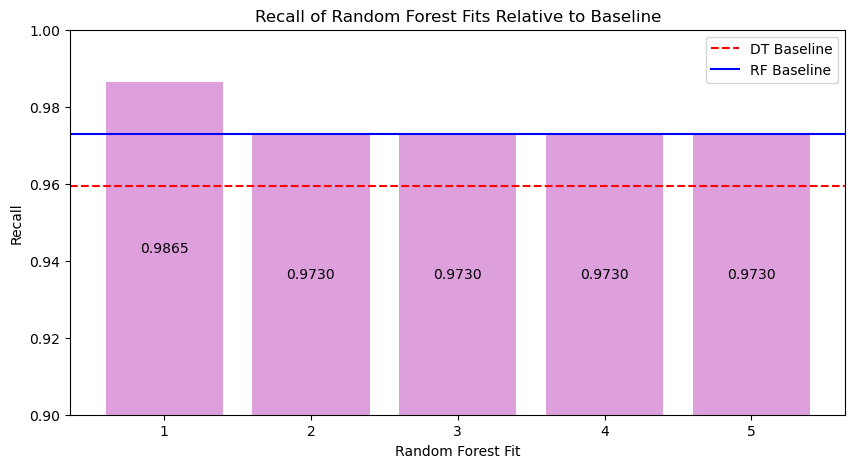

In [48]:
# I will utilize the humble bar chart
# Handy dandy color mapping!
#colors = ['green' if acc >= my_rf_recall else 'yellow' if acc >= dt_recall else 'red' for acc in rf_experiments_recall]
#labels = ['Accuracy >= RF' if acc >= basline_rf_acc else 'DT <= Accuracy < RF' if acc >= baseline_dt_acc else 'Accuracy < DT' for acc in rf_experiments_accuracy]
#labels = ['Accuracy < DT', 'Accuracy >= RF',  'DT <= Accuracy < RF', '_Accuracy >= RF', '_DT <= Accuracy < RF', '_Accuracy < DT', '_Accuracy < DT', '_DT <= Accuracy < RF', '_DT <= Accuracy < RF','_Accuracy < DT']
fig, ax = plt.subplots(figsize=(10,5))
bar_container = ax.bar(range(1,6), rf_experiments_recall, color="plum")
ax.set(xlabel='Random Forest Fit', ylabel='Recall')
plt.axhline(y=dt_recall, color='red', linestyle='--', label='DT Baseline')
plt.axhline(y=my_rf_recall, color='blue', linestyle='-', label='RF Baseline')
ax.bar_label(bar_container, fmt='{:,.4f}',  label_type='center')
ax.set_xticks(range(1,6))
ax.set_ylim(0.9, 1.0)
ax.set_title('Recall of Random Forest Fits Relative to Baseline')
ax.legend()
plt.show()

In [47]:
print(v1acc)
print(v1prec)
print(v1f1)
print(v1rec)

0.986013986013986
0.9864864864864865
0.9864864864864865
0.9864864864864865


In [49]:
print(dt_recall)

0.9594594594594594
